In [1]:
import pandas as pd 
import matplotlib.pyplot as plt                         
import seaborn as sns                                    
from sklearn.cluster import AgglomerativeClustering     
from scipy.cluster.hierarchy import dendrogram, linkage  
from palmerpenguins import load_penguins  # For penguins dataset

In [2]:
# Loads the penguins dataset
df = load_penguins()

# Drop variables and NaN cases, rename variable
df = df.drop(['island', 'year', 'sex'], axis=1) \
    .dropna() \
    .rename(columns={'species': 'y'})

# Selects a random sample of 75 cases
df = df.sample(n=75, random_state=1)

# Separates the class variable in y
y = df.y

# Removes the y column from df
df = df.drop('y', axis=1)

# Displays the first 5 rows of df
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
103,37.8,20.0,190.0,4250.0
126,38.8,17.6,191.0,3275.0
12,41.1,17.6,182.0,3200.0
249,46.9,14.6,222.0,4875.0
239,51.3,14.2,218.0,5300.0


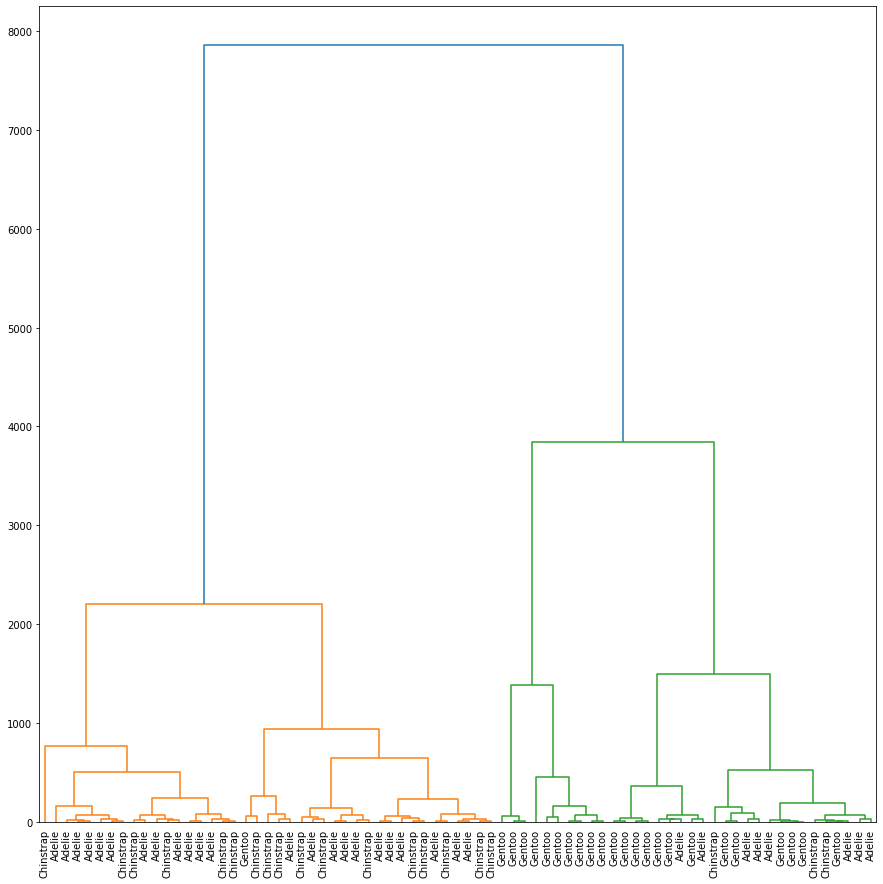

In [3]:
# Perform agglomerative clustering using `ward` linkage and `euclidean` metric
hc = linkage(df, method='ward', metric='euclidean')

# figure size needs to be large enough to visualize all leaves easily
fig = plt.figure(figsize=(15, 15))

# Displays the dendogram
dn = dendrogram(
    hc,
    leaf_label_func=lambda id: y.values[id], # The lambda function is setting the labels of each leaf
    leaf_font_size=10)